In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
f = open('0355_1_8.ascii', 'r')

In [5]:
f = open('0355_1_8.ascii', 'r')  # We need to re-open the file
data = f.read()
f.close()

In [10]:
f = open('0355_1_8.ascii', 'r')

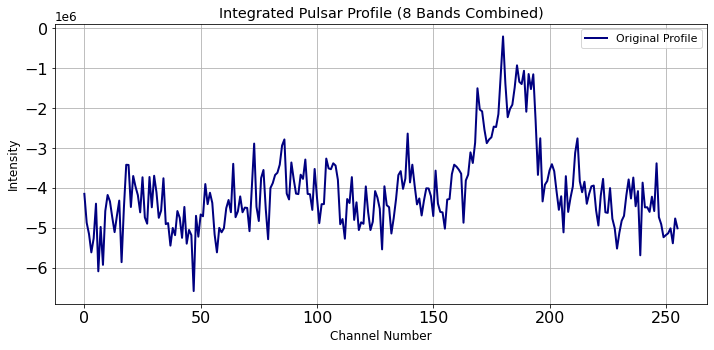

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# File path
filename = "0355_1_8.ascii"

# Load the file, skipping the first line (header)
with open(filename, 'r') as f:
    lines = f.readlines()[1:]  # skip header line

# Parse the data, removing the first value of each line (index)
data = []
for line in lines:
    parts = line.strip().split()
    if len(parts) >= 9:  # first is index, next 8 are band values
        values = [float(x) for x in parts[1:9]]  # ignore first column (index)
        data.append(values)

# Convert to a numpy array: shape (n_bins, 8)
data = np.array(data)

# Transpose to shape (8, n_bins) so we can sum across bands
bands = data.T

# Integrate (sum) over all 8 bands
integrated_profile = np.sum(bands, axis=0)

# Plot the integrated profile
plt.figure(figsize=(10, 5))
plt.plot(integrated_profile, color='navy', linewidth=2, label = "Original Profile")
plt.title("Integrated Pulsar Profile (8 Bands Combined)")
plt.xlabel("Channel Number")
plt.ylabel("Intensity")
plt.legend(fontsize = 11)
plt.grid(True)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=16)
plt.savefig("Combined_pulse_profile.png")
plt.show()


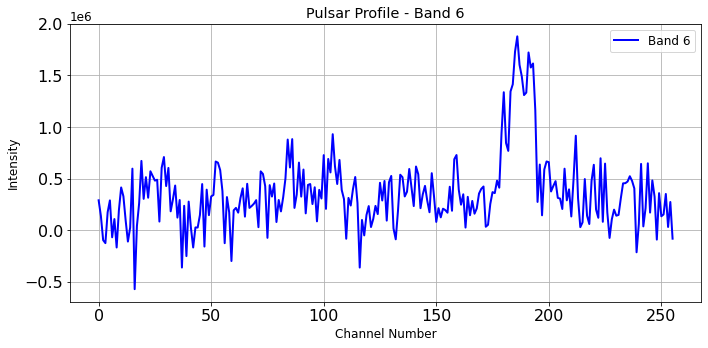

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# File path
filename = "0355_1_8.ascii"

# === Select band number here (1 to 8) ===
selected_band = 6  # Change to 2, 3, ..., 8 for other bands

# Sanity check
if not (1 <= selected_band <= 8):
    raise ValueError("Band number must be between 1 and 8.")

# Load and process the file
with open(filename, 'r') as f:
    lines = f.readlines()[1:]  # Skip the first line

# Extract only the selected band column (ignore the first entry in each line)
intensities = []
for line in lines:
    parts = line.strip().split()
    if len(parts) >= 9:  # First is index, next 8 are bands
        intensity = float(parts[selected_band])  # parts[1] is Band 1, parts[2] is Band 2, ...
        intensities.append(intensity)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(intensities, label=f'Band {selected_band}', color='blue', linewidth=2)
plt.title(f"Pulsar Profile - Band {selected_band}")
plt.xlabel("Channel Number", fontsize = 12)
plt.ylabel("Intensity", fontsize = 12)
plt.grid(True)
plt.rcParams.update({"font.size":12})
plt.legend(fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.savefig("band_6_profile.png")
plt.show()


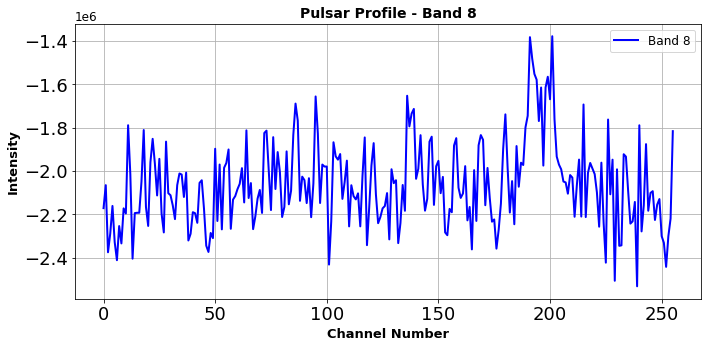

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# File path
filename = "0355_1_8.ascii"

# === Select band number here (1 to 8) ===
selected_band = 8  # Change to 2, 3, ..., 8 for other bands

# Sanity check
if not (1 <= selected_band <= 8):
    raise ValueError("Band number must be between 1 and 8.")

# Load and process the file
with open(filename, 'r') as f:
    lines = f.readlines()[1:]  # Skip the first line

# Extract only the selected band column (ignore the first entry in each line)
intensities = []
for line in lines:
    parts = line.strip().split()
    if len(parts) >= 9:  # First is index, next 8 are bands
        intensity = float(parts[selected_band])  # parts[1] is Band 1, parts[2] is Band 2, ...
        intensities.append(intensity)
        
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(intensities, label=f'Band {selected_band}', color='blue', linewidth=2)
plt.title(f"Pulsar Profile - Band {selected_band}", fontsize=14, fontweight='bold')
plt.xlabel("Channel Number", fontsize=13, fontweight='bold')
plt.ylabel("Intensity", fontsize=13, fontweight='bold')

# Increase tick label size
plt.tick_params(axis='both', which='major', labelsize=18)

plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
# plt.savefig("band_8_profile.png")
plt.show()


Gaussian Fit Results for Band 1:
Peak Amplitude  : 554669.55
Peak Position   : 168.40 (channel)
Sigma (std dev) : 6.10
FWHM            : 14.37
Offset (baseline): -809924.65


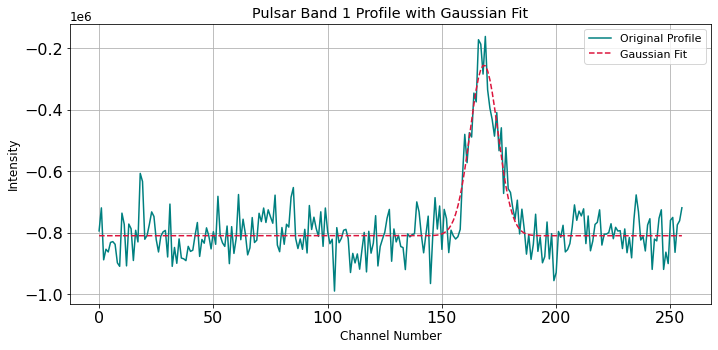

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Gaussian model
def gaussian(x, a, x0, sigma, offset):
    return a * np.exp(-((x - x0)**2) / (2 * sigma**2)) + offset

# File path
filename = "0355_1_8.ascii"

# === Select band number here (1 to 8) ===
selected_band = 1  # Change this to pick the band

# Sanity check
if not (1 <= selected_band <= 8):
    raise ValueError("Band number must be between 1 and 8.")

# Load and parse data
with open(filename, 'r') as f:
    lines = f.readlines()[1:]  # Skip header

intensities = []
for line in lines:
    parts = line.strip().split()
    if len(parts) >= 9:
        intensity = float(parts[selected_band])  # 1-based index
        intensities.append(intensity)

intensities = np.array(intensities)
x = np.arange(len(intensities))

# === Fit Gaussian ===
# Initial guesses: amplitude, center, sigma, offset
a_guess = np.max(intensities) - np.min(intensities)
x0_guess = np.argmax(intensities)
sigma_guess = len(intensities) / 20
offset_guess = np.min(intensities)

p0 = [a_guess, x0_guess, sigma_guess, offset_guess]

try:
    popt, _ = curve_fit(gaussian, x, intensities, p0=p0)
    fitted = gaussian(x, *popt)
    
    print(f"\nGaussian Fit Results for Band {selected_band}:")
    print(f"Peak Amplitude  : {popt[0]:.2f}")
    print(f"Peak Position   : {popt[1]:.2f} (channel)")
    print(f"Sigma (std dev) : {popt[2]:.2f}")
    print(f"FWHM            : {2.355 * popt[2]:.2f}")
    print(f"Offset (baseline): {popt[3]:.2f}")
    
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(x, intensities, label='Original Profile', color='teal')
    plt.plot(x, fitted, '--', label='Gaussian Fit', color='crimson')
    plt.title(f"Pulsar Band {selected_band} Profile with Gaussian Fit")
    plt.xlabel("Channel Number")
    plt.ylabel("Intensity")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.legend(fontsize = 11)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.savefig("Band_1_gaussian_fit.png")
    plt.show()

except RuntimeError:
    print("Gaussian fit failed. Try adjusting initial guesses or smoothing the data.")


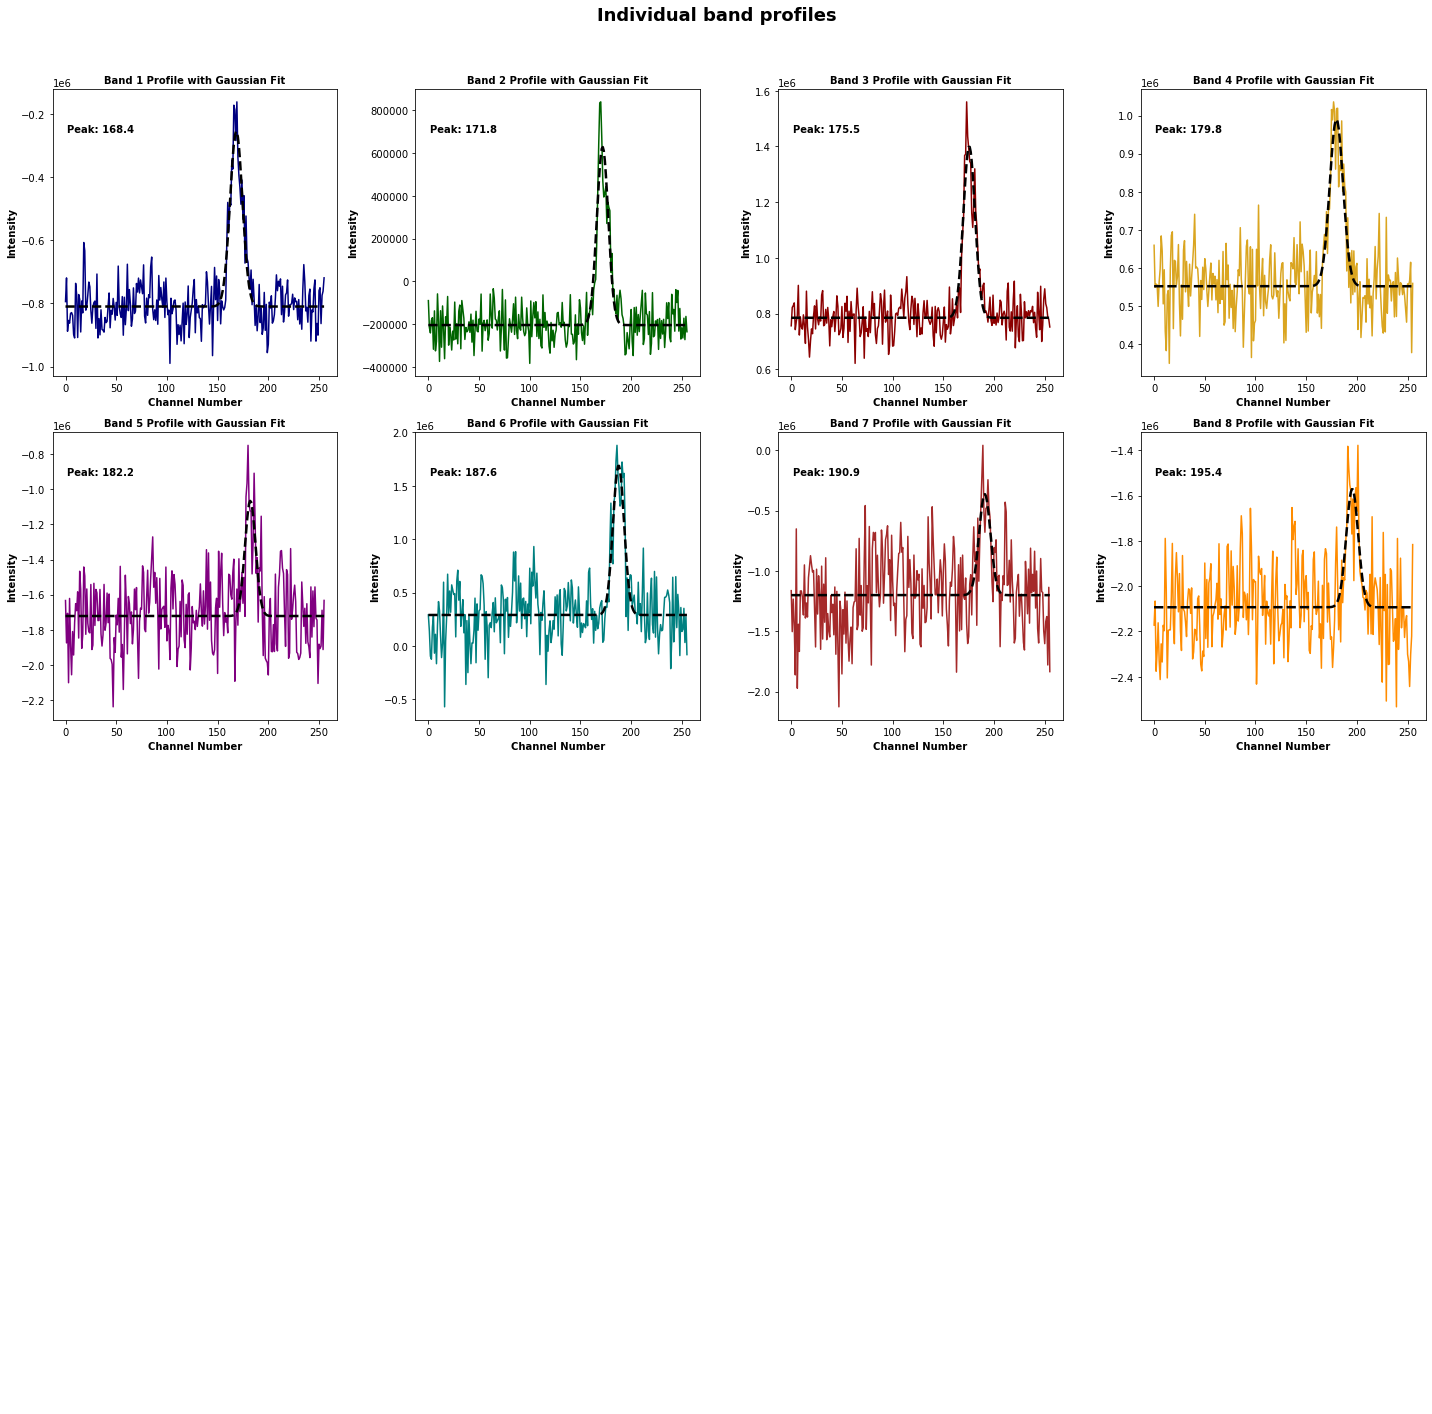

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Gaussian model
def gaussian(x, a, x0, sigma, offset):
    return a * np.exp(-((x - x0)**2) / (2 * sigma**2)) + offset

# File path
filename = "0355_1_8.ascii"

# Load and parse data (skip header and line indices)
with open(filename, 'r') as f:
    lines = f.readlines()[1:]

data = []
for line in lines:
    parts = line.strip().split()
    if len(parts) >= 9:
        values = [float(x) for x in parts[1:9]]  # skip index
        data.append(values)

data = np.array(data)  # shape: (n_bins, 8)
data = data.T          # shape: (8, n_bins)

# Colors for each band (8 distinct ones)
colors = ['navy', 'darkgreen', 'darkred', 'goldenrod', 'purple', 'teal', 'brown', 'darkorange']

# Create 4x4 grid, we'll fill first 8
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
fig.suptitle("Individual band profiles", fontsize=18, fontweight='bold')

for band_idx in range(8):
    ax = axes.flat[band_idx]
    intensities = data[band_idx]
    x = np.arange(len(intensities))

    # Initial guess for Gaussian
    a_guess = np.max(intensities) - np.min(intensities)
    x0_guess = np.argmax(intensities)
    sigma_guess = len(intensities) / 20
    offset_guess = np.min(intensities)
    p0 = [a_guess, x0_guess, sigma_guess, offset_guess]

    try:
        popt, _ = curve_fit(gaussian, x, intensities, p0=p0)
        fitted = gaussian(x, *popt)
        peak_pos = popt[1]

        # Plot original and fit
        ax.plot(x, intensities, color=colors[band_idx], label='Profile')
        ax.plot(x, fitted, color='black', linewidth=2.5, linestyle='--', label='Gaussian Fit')

        # Annotate peak
        ax.text(0.05, 0.85, f"Peak: {peak_pos:.1f}", transform=ax.transAxes,
                fontsize=10, fontweight='bold')

    except RuntimeError:
        ax.plot(x, intensities, color=colors[band_idx])
        ax.text(0.05, 0.85, "Fit failed", transform=ax.transAxes,
                fontsize=10, fontweight='bold')

    # Axis and title
    ax.set_title(f"Band {band_idx + 1} Profile with Gaussian Fit", fontweight='bold', fontsize=10)
    ax.set_xlabel("Channel Number", fontweight='bold')
    ax.set_ylabel("Intensity", fontweight='bold')
    ax.grid(False)

# Hide unused subplots
for i in range(8, 16):
    axes.flat[i].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for supertitle
plt.savefig("Integrated_plot.png")
plt.show()


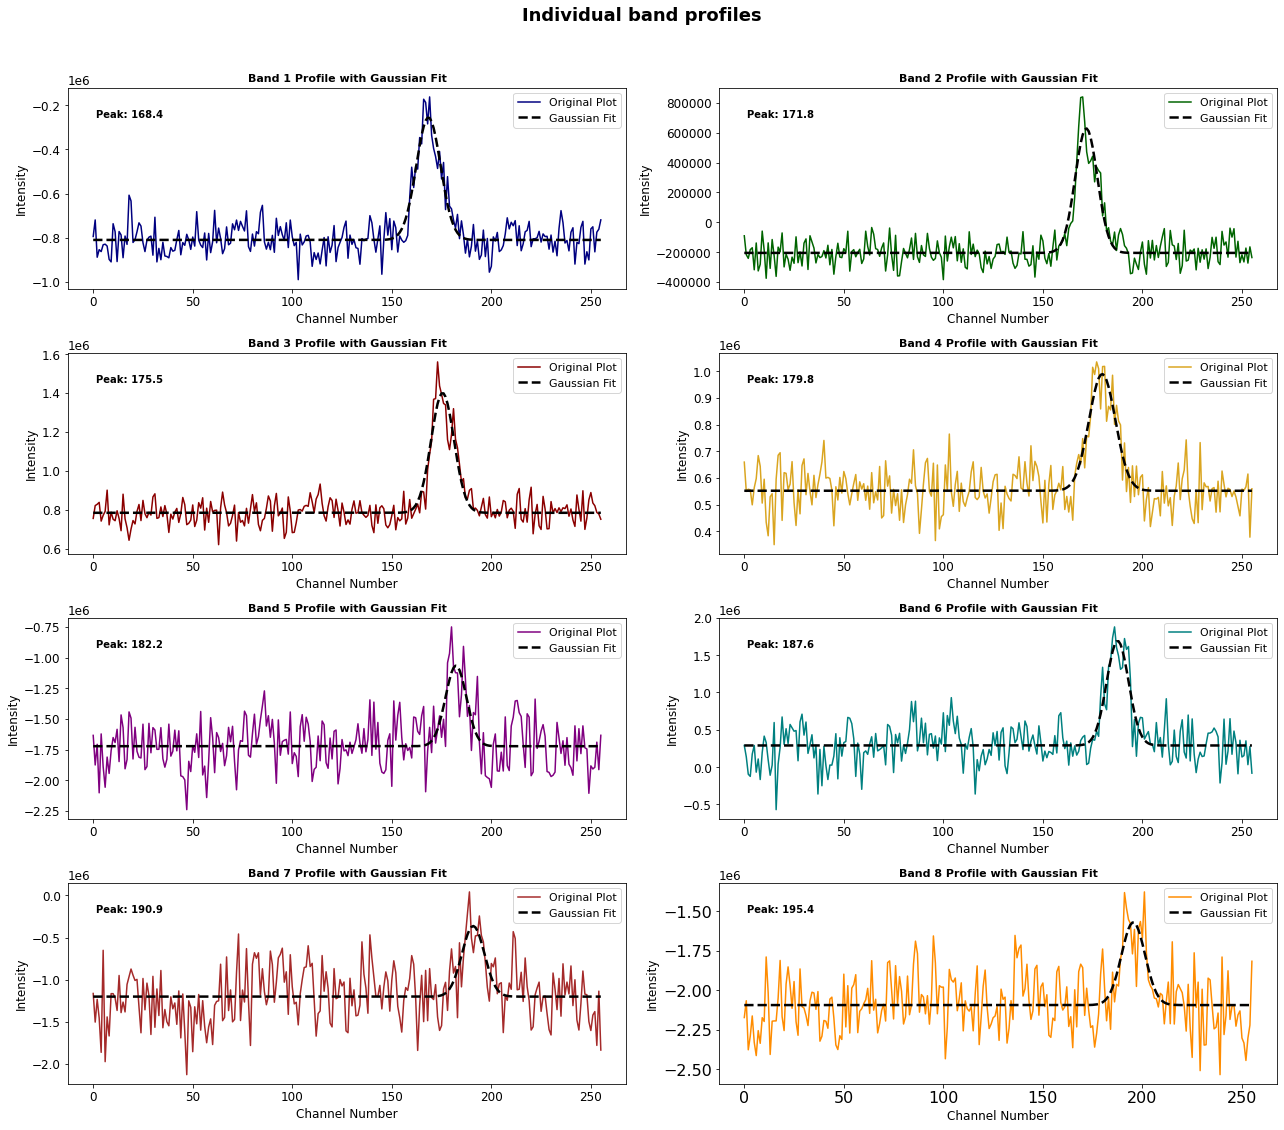

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Gaussian model
def gaussian(x, a, x0, sigma, offset):
    return a * np.exp(-((x - x0)**2) / (2 * sigma**2)) + offset

# File path
filename = "0355_1_8.ascii"

# Load and parse data (skip header and line indices)
with open(filename, 'r') as f:
    lines = f.readlines()[1:]

data = []
for line in lines:
    parts = line.strip().split()
    if len(parts) >= 9:
        values = [float(x) for x in parts[1:9]]  # skip index
        data.append(values)

data = np.array(data)  # shape: (n_bins, 8)
data = data.T          # shape: (8, n_bins)

# Colors for each band
colors = ['navy', 'darkgreen', 'darkred', 'goldenrod', 'purple', 'teal', 'brown', 'darkorange']

# Create 4x2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(18, 16))
fig.suptitle("Individual band profiles", fontsize=18, fontweight='bold')

for band_idx in range(8):
    ax = axes[band_idx // 2, band_idx % 2]
    intensities = data[band_idx]
    x = np.arange(len(intensities))

    # Initial guess for Gaussian fit
    a_guess = np.max(intensities) - np.min(intensities)
    x0_guess = np.argmax(intensities)
    sigma_guess = len(intensities) / 20
    offset_guess = np.min(intensities)
    p0 = [a_guess, x0_guess, sigma_guess, offset_guess]

    try:
        popt, _ = curve_fit(gaussian, x, intensities, p0=p0)
        fitted = gaussian(x, *popt)
        peak_pos = popt[1]

        # Plot raw and fit
        ax.plot(x, intensities, color=colors[band_idx], label='Original Plot')
        ax.plot(x, fitted, color='black', linewidth=2.5, linestyle='--', label='Gaussian Fit')
        plt.tick_params(axis='both', which='major', labelsize=16)

        # Annotate peak position
        ax.text(0.05, 0.85, f"Peak: {peak_pos:.1f}", transform=ax.transAxes,
                fontsize=10, fontweight='bold')

    except RuntimeError:
        ax.plot(x, intensities, color=colors[band_idx], label='Original Plot')
        ax.text(0.05, 0.85, "Fit failed", transform=ax.transAxes,
                fontsize=10, fontweight='bold')

    # Titles and labels
    ax.set_title(f"Band {band_idx + 1} Profile with Gaussian Fit", fontweight='bold', fontsize=11)
    plt.tick_params(axis='both', which='major', labelsize=16)
    ax.set_xlabel("Channel Number")
    
    ax.set_ylabel("Intensity")
    ax.grid(False)
    ax.legend(fontsize=11)


plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for title space

plt.savefig("band_peak_gaussian_fit.png")
plt.show()


In [36]:
import numpy as np
from scipy.optimize import curve_fit
import csv

# === CONFIG ===
filename = "0355_1_8.ascii"
pulse_period = 156.38  # in ms
n_channels = 256
bandwidth = 12.3
start_freq = 1430.30

# Gaussian function
def gaussian(x, a, x0, sigma, offset):
    return a * np.exp(-((x - x0)**2) / (2 * sigma**2)) + offset

# Load data
with open(filename, 'r') as f:
    lines = f.readlines()[1:]  # Skip header

data = []
for line in lines:
    parts = line.strip().split()
    if len(parts) >= 9:
        values = [float(x) for x in parts[1:9]]
        data.append(values)

data = np.array(data).T  # shape: (8 bands, n_bins)

# Prepare data rows
rows = []
for band_idx in range(8):
    band_number = band_idx + 1
    central_freq = start_freq - (band_idx * bandwidth) - (bandwidth / 2)

    intensities = data[band_idx]
    x = np.arange(len(intensities))

    # Initial guesses
    a_guess = np.max(intensities) - np.min(intensities)
    x0_guess = np.argmax(intensities)
    sigma_guess = len(intensities) / 20
    offset_guess = np.min(intensities)
    p0 = [a_guess, x0_guess, sigma_guess, offset_guess]

    try:
        popt, _ = curve_fit(gaussian, x, intensities, p0=p0)
        peak_channel = popt[1]
    except RuntimeError:
        peak_channel = -1  # Indicate failure

    # Compute time of arrival
    if peak_channel != -1:
        time_of_arrival = (pulse_period / n_channels) * peak_channel
    else:
        time_of_arrival = "Fit failed"

    rows.append([
        band_number,
        round(central_freq, 2),
        round(peak_channel, 2) if peak_channel != -1 else "Fit failed",
        round(time_of_arrival, 4) if peak_channel != -1 else "Fit failed"
    ])

# Write CSV
csv_filename = "pulsar_band_peaks.csv"
with open(csv_filename, mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["Band Number", "Central Frequency (MHz)", "Peak Channel", "Time of Arrival (ms)"])
    writer.writerows(rows)

print(f"CSV file '{csv_filename}' has been created successfully.")


CSV file 'pulsar_band_peaks.csv' has been created successfully.


In [38]:
import numpy as np
from scipy.optimize import curve_fit
import csv

# === CONFIG ===
filename = "0355_1_8.ascii"
pulse_period = 156.38  # ms
n_channels = 256
bandwidth = 12.3
start_freq = 1430.30

# Gaussian model
def gaussian(x, a, x0, sigma, offset):
    return a * np.exp(-((x - x0)**2) / (2 * sigma**2)) + offset

# Load data
with open(filename, 'r') as f:
    lines = f.readlines()[1:]  # Skip header

data = []
for line in lines:
    parts = line.strip().split()
    if len(parts) >= 9:
        values = [float(x) for x in parts[1:9]]
        data.append(values)

data = np.array(data).T  # shape: (8 bands, n_bins)

# Output data rows
rows = []

for band_idx in range(8):
    band_number = band_idx + 1
    central_freq = start_freq - (band_idx * bandwidth) - (bandwidth / 2)

    intensities = data[band_idx]
    x = np.arange(len(intensities))

    # Initial guesses
    a_guess = np.max(intensities) - np.min(intensities)
    x0_guess = np.argmax(intensities)
    sigma_guess = len(intensities) / 20
    offset_guess = np.min(intensities)
    p0 = [a_guess, x0_guess, sigma_guess, offset_guess]

    try:
        popt, pcov = curve_fit(gaussian, x, intensities, p0=p0)
        peak_channel = popt[1]
        peak_error = np.sqrt(np.abs(pcov[1][1]))  # Ensure non-negative
        toa = (pulse_period / n_channels) * peak_channel
        toa_error = (pulse_period / n_channels) * peak_error
    except Exception as e:
        peak_channel = "Fit failed"
        peak_error = "N/A"
        toa = "Fit failed"
        toa_error = "N/A"

    rows.append([
        band_number,
        round(central_freq, 2),
        round(peak_channel, 2) if isinstance(peak_channel, float) else peak_channel,
        round(peak_error, 4) if isinstance(peak_error, float) else peak_error,
        round(toa, 4) if isinstance(toa, float) else toa,
        round(toa_error, 4) if isinstance(toa_error, float) else toa_error
    ])

# Save to CSV
csv_filename = "pulsar_band_peaks_with_errors.csv"
with open(csv_filename, mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow([
        "Band Number",
        "Central Frequency (MHz)",
        "Peak Channel",
        "Peak Channel Error",
        "Time of Arrival (ms)",
        "ToA Error (ms)"
    ])
    writer.writerows(rows)

print(f"CSV file '{csv_filename}' has been created with peak and error information.")


CSV file 'pulsar_band_peaks_with_errors.csv' has been created with peak and error information.


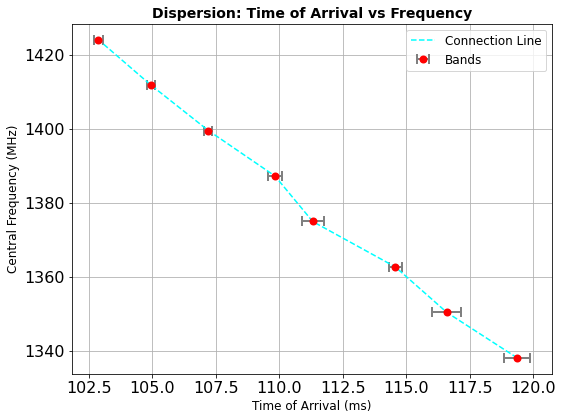

In [53]:
import csv
import matplotlib.pyplot as plt

# Read the CSV file
csv_filename = "pulsar_band_peaks_with_errors.csv"

toa = []
toa_err = []
freq = []

with open(csv_filename, 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        try:
            if row["Time of Arrival (ms)"] != "Fit failed":
                toa.append(float(row["Time of Arrival (ms)"]))
                toa_err.append(float(row["ToA Error (ms)"]))
                freq.append(float(row["Central Frequency (MHz)"]))
        except ValueError:
            continue

# Sort by frequency (just in case)
sorted_data = sorted(zip(freq, toa, toa_err))
freq, toa, toa_err = zip(*sorted_data)

# Plotting
plt.figure(figsize=(8, 6))
plt.errorbar(toa, freq, xerr=toa_err, fmt='o', capsize=5, color='red',
             ecolor='gray', elinewidth=2, markeredgewidth=2, label='Bands')
plt.plot(toa, freq, linestyle='--', color='cyan', label='Connection Line')

plt.xlabel("Time of Arrival (ms)", fontsize = 12)
plt.ylabel("Central Frequency (MHz)", fontsize = 12)
plt.title("Dispersion: Time of Arrival vs Frequency", fontsize=14, fontweight='bold')
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend()
plt.tight_layout()
plt.savefig("Dispersion_measure_plot.png")
plt.show()


In [27]:
import pandas as pd

filename = "pulsar_band_peaks_with_errors.csv"

df = pd.read_csv(filename)

print(df)


C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


   Band Number  Central Frequency (MHz)  Peak Channel  Peak Channel Error  \
0            1                  1424.15        168.40              0.3061   
1            2                  1411.85        171.80              0.2634   
2            3                  1399.55        175.50              0.2591   
3            4                  1387.25        179.80              0.4743   
4            5                  1374.95        182.23              0.7035   
5            6                  1362.65        187.56              0.4416   
6            7                  1350.35        190.88              0.9286   
7            8                  1338.05        195.42              0.8494   

   Time of Arrival (ms)  ToA Error (ms)  
0              102.8709          0.1870  
1              104.9448          0.1609  
2              107.2085          0.1583  
3              109.8316          0.2897  
4              111.3161          0.4297  
5              114.5743          0.2698  
6           